## **Import Libraries**

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Read Data** 

In [165]:
df = pd.read_csv('data/tested.csv')

## **Inspect data**

In [166]:
df.shape

(418, 12)

In [167]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [168]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [169]:
df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].transform(
    lambda x: x.fillna(x.median())
)
df['Fare'] = df['Fare'].fillna(
    df.groupby('Pclass')['Fare'].transform('median')
)
df = df.drop(columns=['Cabin'])

In [170]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [171]:
df[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


No duplicated row

In [172]:
df['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

Different Embarked Locations

Q = Queenstown (now Cobh, Ireland)
S = Southampton (England)
C = Cherbourg (France) 

In [173]:
df.shape

(418, 11)

## **Data Exploration**

### **Age Distribution**

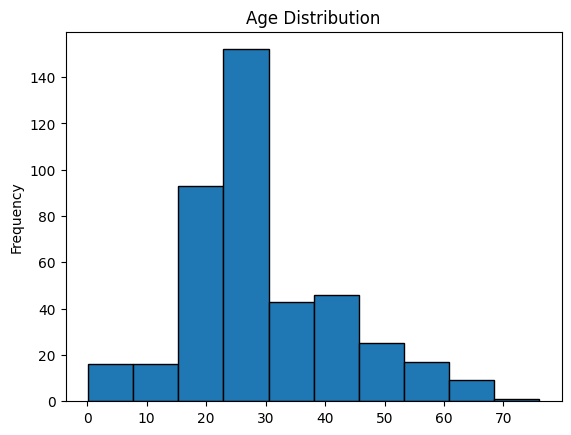

In [174]:
df['Age'].plot(kind='hist',edgecolor='black',title='Age Distribution')
plt.savefig('images/age_distribution')
plt.show()

## **Gender Distribution**

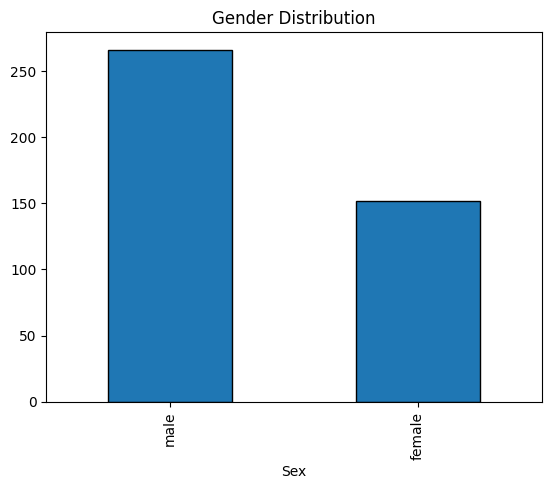

In [175]:
df['Sex'].value_counts().plot(kind='bar',edgecolor='black',title='Gender Distribution')
plt.savefig('images/gender_distribution')
plt.show()

## **Embarked Distribution**

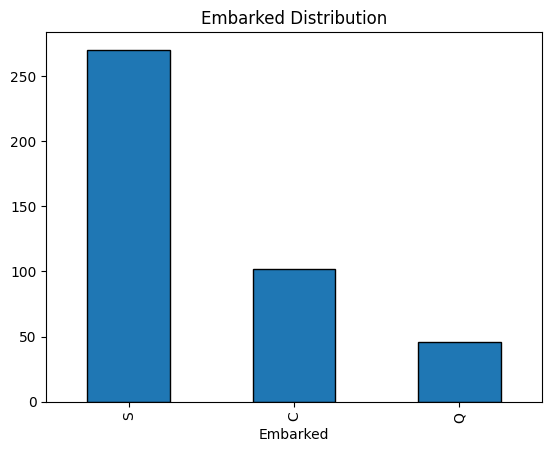

In [176]:
df['Embarked'].value_counts().plot(kind='bar',edgecolor='black',title='Embarked Distribution')
plt.savefig('images/embarked_distribution')
plt.show()

## **Survived distribution**

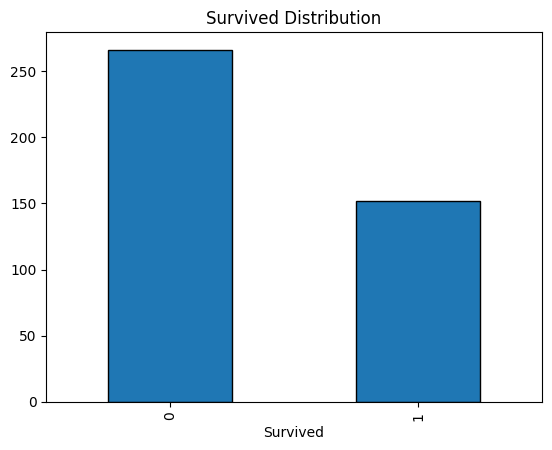

In [177]:
df['Survived'].value_counts().plot(kind='bar',edgecolor='black',title='Survived Distribution')
plt.savefig('images/survived_distribution')
plt.show()

## **Correlation Check**

### P class and survival

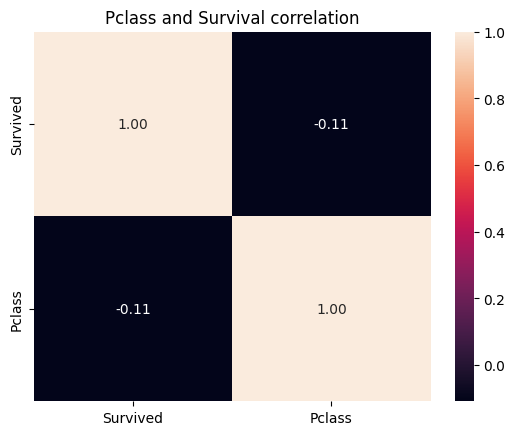

In [178]:
class_survival_corr = df[['Survived','Pclass']].corr()
sns.heatmap(data=class_survival_corr, annot=True, fmt=".2f")
plt.title('Pclass and Survival correlation')
plt.show()

A negative correlation, as the pclass increases the survival decreses

In [179]:
df.groupby("Pclass")["Survived"].mean()

Pclass
1    0.467290
2    0.322581
3    0.330275
Name: Survived, dtype: float64

In [185]:
df.groupby("Sex")["Survived"].value_counts()

Sex     Survived
female  1           152
male    0           266
Name: count, dtype: int64

In [184]:
df['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64